In [1]:
# Automatically reload modules after executing each cell.
%load_ext autoreload
%autoreload 2

In [2]:
# General imports
import os
import tensorflow as tf
from scipy import stats

# Utility imports
from utils.losses import *
from utils.plotting import *
from utils.training import *

from flows.flows import *

np.random.seed(666) # Need to do more to ensure data is the same across runs.

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Training

## BCE $C$ Parametrization

In [4]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'sigmoid/'):
    os.mkdir(filestr + 'sigmoid/')
    
if not os.path.isdir(filestr + 'tanh/'):
    os.mkdir(filestr + 'tanh/')

if not os.path.isdir(filestr + 'arctan/'):
    os.mkdir(filestr + 'arctan/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [5]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

0 

2023-03-13 01:35:52.577575: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 01:35:53.145844: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22824 MB memory:  -> device: 0, name: Quadro RTX 6000, pci bus id: 0000:81:00.0, compute capability: 7.5


0.6808610558509827 	 100	0.681869387626648 	 100	0.6807548999786377 	 100	
1 0.6806455850601196 	 100	0.6802511215209961 	 100	0.6813215613365173 	 100	
2 0.6810320019721985 	 100	0.6810562610626221 	 100	0.6810301542282104 	 100	
3 0.6808730959892273 	 100	0.6804830431938171 	 100	0.6805093884468079 	 100	
4 0.6806899905204773 	 100	0.6808772683143616 	 100	0.6809656620025635 	 100	
5 0.6813719868659973 	 100	0.6810716390609741 	 100	0.6810886263847351 	 100	
6 0.6812192797660828 	 100	0.6818314790725708 	 100	0.6810336112976074 	 100	
7 0.6812955737113953 	 100	0.6816337704658508 	 100	0.6812264919281006 	 100	
8 0.6807193756103516 	 100	0.6809660792350769 	 100	0.6814044713973999 	 100	
9 0.681367039680481 	 100	0.681011974811554 	 100	0.6807308197021484 	 100	
10 0.6811628937721252 	 100	0.6809093356132507 	 100	0.6808534264564514 	 100	
11 0.6809785962104797 	 100	0.681228756904602 	 100	0.6806591153144836 	 100	
12 0.6807873845100403 	 100	0.681609570980072 	 100	0.68107879161834

## MSE $C$ Parametrization

In [6]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'sigmoid/'):
    os.mkdir(filestr + 'sigmoid/')
    
if not os.path.isdir(filestr + 'tanh/'):
    os.mkdir(filestr + 'tanh/')

if not os.path.isdir(filestr + 'arctan/'):
    os.mkdir(filestr + 'arctan/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [7]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

0 0.2438976913690567 	 100	0.2440250813961029 	 100	0.2440696507692337 	 100	
1 0.24396079778671265 	 100	0.2442931830883026 	 100	0.24425038695335388 	 100	
2 0.2440095990896225 	 100	0.24392442405223846 	 100	0.24399790167808533 	 100	
3 0.24398000538349152 	 100	0.24427850544452667 	 100	0.2440350502729416 	 100	
4 0.24398009479045868 	 100	0.24424007534980774 	 100	0.24399946630001068 	 100	
5 0.24402102828025818 	 100	0.24423038959503174 	 100	0.24406728148460388 	 100	
6 0.24397312104701996 	 100	0.24418553709983826 	 100	0.24397435784339905 	 100	
7 0.24404950439929962 	 100	0.24403241276741028 	 100	0.24420668184757233 	 100	
8 0.2438756823539734 	 100	0.24381296336650848 	 100	0.24405573308467865 	 100	
9 0.24403180181980133 	 100	0.2440965324640274 	 100	0.24403563141822815 	 100	
10 0.24413436651229858 	 100	0.24418993294239044 	 100	0.2441338151693344 	 100	
11 0.24405677616596222 	 100	0.24413898587226868 	 100	0.24413837492465973 	 100	
12 0.24400866031646729 	 100	0.2438

## MLC $C$ Parametrization

In [8]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'relu/'):
    os.mkdir(filestr + 'relu/')
    
if not os.path.isdir(filestr + 'square/'):
    os.mkdir(filestr + 'square/')

if not os.path.isdir(filestr + 'exponential/'):
    os.mkdir(filestr + 'exponential/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [9]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

0 -0.019425896927714348 	 100	-0.007375289220362902 	 100	-0.025564441457390785 	 100	
1 -0.01900576241314411 	 100	-0.018705960363149643 	 100	-0.024013709276914597 	 100	
2 -0.01778598129749298 	 100	-0.018762758001685143 	 80	-0.02520834282040596 	 100	
3 -0.018296264111995697 	 100	-0.018699729815125465 	 80	-0.02613402158021927 	 100	
4 -0.01885576918721199 	 100	-0.01735215075314045 	 100	-0.025077080354094505 	 100	
5 -0.019540706649422646 	 100	0.0005992439691908658 	 100	-0.025797512382268906 	 100	
6 -0.018440213054418564 	 100	-0.019444242119789124 	 100	-0.025846563279628754 	 100	
7 -0.018965553492307663 	 100	0.45960918068885803 	 62	-0.025806359946727753 	 100	
8 -0.019467707723379135 	 100	-0.020443124696612358 	 100	-0.026163101196289062 	 100	
9 -0.018319087103009224 	 100	0.44902142882347107 	 48	-0.026395084336400032 	 100	
10 -0.01839389093220234 	 100	-0.01578204333782196 	 61	-0.02489103190600872 	 100	
11 -0.018321050330996513 	 100	-0.013582189567387104 	 100	-

## SQR $C$ Parametrization

In [10]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'relu/'):
    os.mkdir(filestr + 'relu/')
    
if not os.path.isdir(filestr + 'square/'):
    os.mkdir(filestr + 'square/')

if not os.path.isdir(filestr + 'exponential/'):
    os.mkdir(filestr + 'exponential/')

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [11]:
for i in range(reps):
    print(i, end = ' ')
    model_1, trace = train(data, **params_1)
    model_2, trace = train(data, **params_2)
    model_3, trace = train(data, **params_3)
    print()
    model_1.save_weights(filestr_1.format(i))
    model_2.save_weights(filestr_2.format(i))
    model_3.save_weights(filestr_3.format(i))

0 1.0040920972824097 	 100	5.346105575561523 	 45	0.9877380132675171 	 100	
1 0.9902197122573853 	 100	1.4371525049209595 	 49	0.9875381588935852 	 100	
2 1.0075782537460327 	 100	9.942132949829102 	 16	0.9876576066017151 	 100	
3 0.996518075466156 	 100	1.1551939249038696 	 100	0.9874887466430664 	 100	
4 0.9950430989265442 	 100	1.6541117429733276 	 23	0.987606942653656 	 100	
5 0.9989817142486572 	 100	1.2642873525619507 	 100	0.9881529808044434 	 100	
6 0.9949973821640015 	 100	1.4707839488983154 	 21	0.9873462319374084 	 100	
7 0.9954344630241394 	 100	1.4167026281356812 	 32	0.9876542687416077 	 100	
8 0.9936757683753967 	 100	31.585683822631836 	 15	0.9879322648048401 	 100	
9 0.9964185357093811 	 100	1.0587389469146729 	 100	0.9880397319793701 	 100	
10 1.0150882005691528 	 100	1.2238731384277344 	 21	0.9873902797698975 	 100	
11 0.9961944818496704 	 100	1.4057234525680542 	 100	0.9876660108566284 	 100	
12 1.0079383850097656 	 100	0.9998572468757629 	 100	0.9874369502067566 	 

# MAEs

In [12]:
d = 4

dat_target = make_target(d)
sim_target = make_target(d)

dat_ckpt = tf.train.Checkpoint(dat_target)
sim_ckpt = tf.train.Checkpoint(sim_target)

dat_ckpt.restore('flows/dat6/ckpt-235')
sim_ckpt.restore('flows/sim3/ckpt-235')

In [13]:
lr = lambda x: tf.math.exp(dat_target.log_prob(x) - sim_target.log_prob(x)).numpy()

In [14]:
X_mae = np.load('data/zenodo/fold/X_tst.npy')
lr_tst = lr(X_mae)
np.save('data/zenodo/fold/lr_tst.npy', lr_tst)

In [15]:
X_mae = np.load('data/zenodo/fold/X_tst.npy')
lr_tst = np.load('data/zenodo/fold/lr_tst.npy')

In [16]:
def mae(model_lr):
    abs_dif = abs(model_lr(X_mae) - lr_tst)
    print(np.mean(abs_dif < 100), end = ' ')
    return abs_dif[abs_dif < 100].mean()

## BCE

In [17]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [18]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1, m, s)
    lrs_2[i] = tanh_lr(model_2, m, s)
    lrs_3[i] = arctan_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3, where = ~np.isnan(maes_3))

abs_dif_1 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_1])
abs_dif_2 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_2])
abs_dif_3 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_3])

# Save results
np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'abs_dif_1.npy', abs_dif_1)
np.save(filestr + 'abs_dif_2.npy', abs_dif_2)
np.save(filestr + 'abs_dif_3.npy', abs_dif_3)

avg_1, avg_2, avg_3

0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 

(0.14966658, 0.15346421, 0.15029684)

In [19]:
abs_dif_1 = np.load(filestr + 'abs_dif_1.npy')
(abs_dif_1 > 100).mean()

0.00047

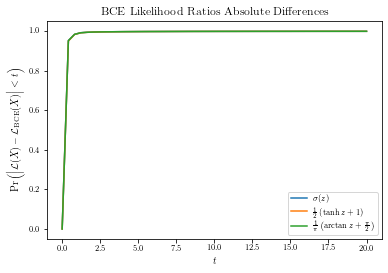

In [20]:
aa = abs_dif_1.flatten()
bb = abs_dif_2.flatten()
cc = abs_dif_3.flatten()

ts = np.linspace(0, 20)
plt.plot(ts, [(aa < t).mean() for t in ts], label = r'$\sigma(z)$')
plt.plot(ts, [(bb < t).mean() for t in ts], label = r'$\frac{1}{2}\left(\tanh{z} + 1\right)$')
plt.plot(ts, [(cc < t).mean() for t in ts], label = r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$')
plt.legend()

plt.xlabel(r'$t$')
plt.ylabel(r'$\text{Pr}\left(\Big|\mathcal{L}(X) - \mathcal{L}_\text{BCE}(X)\Big| < t\right)$')
plt.title(r'BCE Likelihood Ratios Absolute Differences')

plt.savefig('plots/zenodo/bce_threshold_plot.png', 
            dpi=300, 
            bbox_inches='tight')

## MSE

In [21]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [22]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1, m, s)
    lrs_2[i] = tanh_lr(model_2, m, s)
    lrs_3[i] = arctan_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3, where = ~np.isnan(maes_3))

abs_dif_1 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_1])
abs_dif_2 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_2])
abs_dif_3 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_3])

# Save results
np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'abs_dif_1.npy', abs_dif_1)
np.save(filestr + 'abs_dif_2.npy', abs_dif_2)
np.save(filestr + 'abs_dif_3.npy', abs_dif_3)

avg_1, avg_2, avg_3

0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 

(0.14965758, 0.15323049, 0.1507466)

In [23]:
abs_dif_1 = np.load(filestr + 'abs_dif_1.npy')
(abs_dif_1 > 100).mean()

0.00047

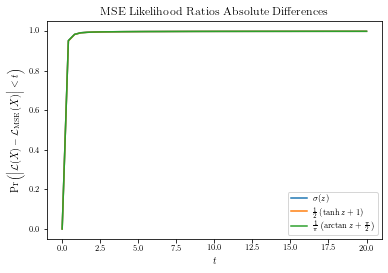

In [24]:
aa = abs_dif_1.flatten()
bb = abs_dif_2.flatten()
cc = abs_dif_3.flatten()

ts = np.linspace(0, 20)
plt.plot(ts, [(aa < t).mean() for t in ts], label = r'$\sigma(z)$')
plt.plot(ts, [(bb < t).mean() for t in ts], label = r'$\frac{1}{2}\left(\tanh{z} + 1\right)$')
plt.plot(ts, [(cc < t).mean() for t in ts], label = r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$')
plt.legend()

plt.xlabel(r'$t$')
plt.ylabel(r'$\text{Pr}\left(\Big|\mathcal{L}(X) - \mathcal{L}_\text{MSE}(X)\Big| < t\right)$')
plt.title(r'MSE Likelihood Ratios Absolute Differences')

plt.savefig('plots/zenodo/mse_threshold_plot.png', 
            dpi=300, 
            bbox_inches='tight')

## MLC

In [25]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [26]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = pure_lr(model_1, m, s)
    lrs_2[i] = square_lr(model_2, m, s)
    lrs_3[i] = exp_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3, where = ~np.isnan(maes_3))

abs_dif_1 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_1])
abs_dif_2 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_2])
abs_dif_3 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_3])

# Save results
np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'abs_dif_1.npy', abs_dif_1)
np.save(filestr + 'abs_dif_2.npy', abs_dif_2)
np.save(filestr + 'abs_dif_3.npy', abs_dif_3)

avg_1, avg_2, avg_3

0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 

(0.18895239, 0.2480759, 0.14602703)

In [27]:
avg_3 = np.load(filestr + 'avg_3.npy')

In [28]:
avg_3

array(0.14602703, dtype=float32)

In [29]:
abs_dif_3 = np.load(filestr + 'abs_dif_3.npy')
(abs_dif_3 > 100).mean()

0.00047

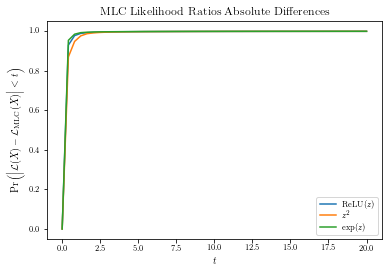

In [30]:
aa = abs_dif_1.flatten()
bb = abs_dif_2.flatten()
cc = abs_dif_3.flatten()

ts = np.linspace(0, 20)
plt.plot(ts, [(aa < t).mean() for t in ts], label = r'${\rm ReLU}(z)$')
plt.plot(ts, [(bb < t).mean() for t in ts], label = r'$z^2$')
plt.plot(ts, [(cc < t).mean() for t in ts], label = r'$\exp(z)$')
plt.legend()

plt.xlabel(r'$t$')
plt.ylabel(r'$\text{Pr}\left(\Big|\mathcal{L}(X) - \mathcal{L}_\text{MLC}(X)\Big| < t\right)$')
plt.title(r'MLC Likelihood Ratios Absolute Differences')

plt.savefig('plots/zenodo/mlc_threshold_plot.png', 
            dpi=300, 
            bbox_inches='tight')

## SQR

In [31]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [32]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = pure_lr(model_1, m, s)
    lrs_2[i] = square_lr(model_2, m, s)
    lrs_3[i] = exp_lr(model_3, m, s)

# Calculate mean absolute errors
maes_1 = [mae(lr) for lr in lrs_1]
maes_2 = [mae(lr) for lr in lrs_2]
maes_3 = [mae(lr) for lr in lrs_3]

avg_1 = np.mean(maes_1)
avg_2 = np.mean(maes_2)
avg_3 = np.mean(maes_3, where = ~np.isnan(maes_3))

abs_dif_1 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_1])
abs_dif_2 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_2])
abs_dif_3 = np.array([abs(lr(X_mae) - lr_tst) for lr in lrs_3])

# Save results
np.save(filestr + 'avg_1.npy', avg_1)
np.save(filestr + 'avg_2.npy', avg_2)
np.save(filestr + 'avg_3.npy', avg_3)

np.save(filestr + 'abs_dif_1.npy', abs_dif_1)
np.save(filestr + 'abs_dif_2.npy', abs_dif_2)
np.save(filestr + 'abs_dif_3.npy', abs_dif_3)

avg_1, avg_2, avg_3

0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99954 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99954 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99954 0.99953 0.99953 0.99953 0.99953 

/tmp/ipykernel_14614/3622325389.py:4: RuntimeWarning: Mean of empty slice.
  return abs_dif[abs_dif < 100].mean()
/clusterfs/ml4hep/shahzar/miniconda/envs/multifold/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


0.99955 0.99953 0.99953 0.99953 0.99936 0.99953 0.99953 0.99953 0.99955 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 

(0.2643403, nan, 0.14872888)

In [33]:
abs_dif_3 = np.load(filestr + 'abs_dif_3.npy')
(abs_dif_3 > 100).mean()

0.00047

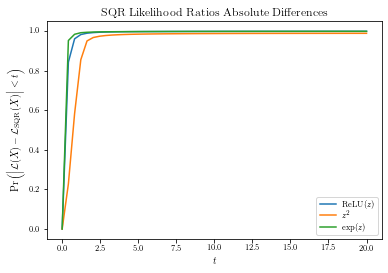

In [34]:
aa = abs_dif_1.flatten()
bb = abs_dif_2.flatten()
cc = abs_dif_3.flatten()

ts = np.linspace(0, 20)
plt.plot(ts, [(aa < t).mean() for t in ts], label = r'${\rm ReLU}(z)$')
plt.plot(ts, [(bb < t).mean() for t in ts], label = r'$z^2$')
plt.plot(ts, [(cc < t).mean() for t in ts], label = r'$\exp(z)$')
plt.legend()

plt.xlabel(r'$t$')
plt.ylabel(r'$\text{Pr}\left(\Big|\mathcal{L}(X) - \mathcal{L}_\text{SQR}(X)\Big| < t\right)$')
plt.title(r'SQR Likelihood Ratios Absolute Differences')

plt.savefig('plots/zenodo/sqr_threshold_plot.png', 
            dpi=300, 
            bbox_inches='tight')

## AB MSE

In [51]:
# Experiment parameters
num = 0
reps = 20

# File parameters
filestr = 'models/zenodo/ab_mse/set_{}/'.format(num)
mse_filestr = filestr + 'model_{}_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

ps = np.round(np.linspace(-2, 2, 101), 2)

In [ ]:
# Get model likelihood ratios.
avgs = []
for p in ps:
    print(p, end = '\t')
    lrs = [None] * reps
    params = {'loss':get_mse(p), 'd': 4}
    for i in range(reps):
        model = create_model(**params)
        model.load_weights(mse_filestr.format(p, i))
        lrs[i] = pow_odds_lr(model, p, m, s)
    
    maes = [mae(lr) for lr in lrs]
    avgs += [np.mean(maes)]

avgs = np.array(avgs)

-2.0	0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 -1.96	0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 -1.92	0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 -1.88	0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 -1.84	0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 -1.8	0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 0.99953 -1.76	

In [ ]:
# Save results
np.save(filestr + 'avgs', avgs)

In [ ]:
avgs = np.load(filestr + 'avgs.npy')

In [ ]:
w = 3.5
h = 3.25              # Plots have dimension (w,h)

plt.figure(figsize = (w, h))

plt.plot(ps, avgs, c='blue', lw = 0.75)

plt.minorticks_on()
plt.tick_params(which = 'minor', length = 3)
plt.tick_params(which = 'major', length = 5)
plt.tick_params(which = 'both', direction='in')
plt.ylabel('Mean Absolute Error')
plt.xlabel(r'$p$')
plt.ylim(0, 1.25)

plt.title(r"\it $A/B$ Parametrization",loc="right");
plt.savefig('plots/paper/ab_mse_zenodo.png', 
            dpi=300, 
            bbox_inches='tight')

## AB SQR

In [ ]:
# Experiment parameters
num = 0
reps = 20

# File parameters
filestr = 'models/zenodo/ab_sqr/set_{}/'.format(num)
lin_filestr = filestr + 'relu/model_{}_{}.h5'
exp_filestr = filestr + 'exponential/model_{}_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

rs = np.sort(np.append(np.round(np.linspace(-2, 2, 81), 2),
                       np.round(np.linspace(-0.05, 0.05, 26), 3)[1:-1]))

In [ ]:
lin_avgs = []
exp_avgs = []

for r in rs:
    print(r, end = '\t')
    lin_lrs = [None] * reps
    exp_lrs = [None] * reps
    lin_params = {'loss': get_sqr(r), 'd': 4, 'output':'relu'}
    exp_params = {'loss': get_exp_sqr(r), 'd': 4, 'output':'linear'}
    
    for i in range(reps):
        lin_model = create_model(**lin_params)
        exp_model = create_model(**exp_params)
        
        lin_model.load_weights(lin_filestr.format(r, i))
        exp_model.load_weights(exp_filestr.format(r, i))
        
        lin_lrs[i] = pow_lr(lin_model, r, m, s)
        exp_lrs[i] = pow_exp_lr(exp_model, r, m, s)
    
    lin_maes = [mae(lr) for lr in lin_lrs]
    exp_maes = [mae(lr) for lr in exp_lrs]
    
    lin_avgs += [np.mean(lin_maes)]
    exp_avgs += [np.mean(exp_maes)]

In [ ]:
# Save results
lin_avgs = np.array(lin_avgs)
exp_avgs = np.array(exp_avgs)

np.save(filestr + 'lin_avgs', lin_avgs)
np.save(filestr + 'exp_avgs', exp_avgs)

In [ ]:
lin_avgs = np.load(filestr + 'lin_avgs.npy')
exp_avgs = np.load(filestr + 'exp_avgs.npy')

rs[lin_avgs == min(lin_avgs)], rs[exp_avgs == min(exp_avgs)]

In [ ]:
plt.figure(figsize = (w, h))

plt.plot(rs, lin_avgs, label=r'$\text{ReLU}(z)$', c='blue', lw = 0.75)
plt.plot(rs, exp_avgs, label=r'$\exp{z}$', c='red', lw = 0.75)
plt.legend()

plt.minorticks_on()
plt.tick_params(which = 'minor', length = 3)
plt.tick_params(which = 'major', length = 5)
plt.tick_params(which = 'both', direction='in')
plt.ylabel('Mean Absolute Error')
plt.xlabel(r'$r$')
#plt.ylim(0, 0.16)

plt.title(r"\it $A/B$ Parametrization",loc="right");
plt.savefig('plots/paper/ab_sqr_zenodo.png', 
            dpi=300, 
            bbox_inches='tight')

# Check NaNs

## BCE

In [35]:
# Experiment parameters
num = 0
filestr = 'models/zenodo/c_bce/set_{}/'.format(num)

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
X_mae = np.load('data/zenodo/fold/' + 'X_tst.npy')
abs_dif_1 = np.load(filestr + 'abs_dif_1.npy')

In [36]:
bad = X_mae[np.any(abs_dif_1 > 100, axis = 0)]

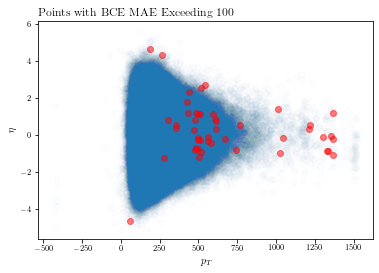

In [37]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 1], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$\eta$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_pt_eta.png', 
            dpi=300, 
            bbox_inches='tight')

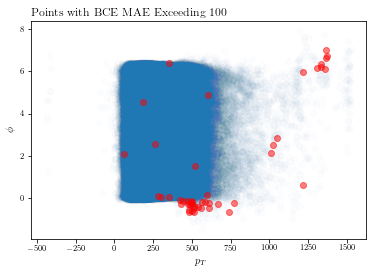

In [38]:
plt.scatter(X[:, 0], X[:, 2], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 2], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$\phi$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_pt_phi.png', 
            dpi=300, 
            bbox_inches='tight')

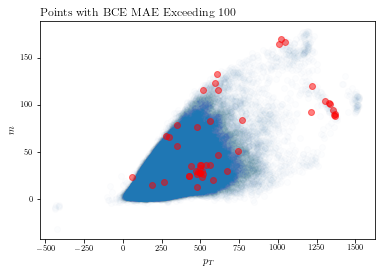

In [39]:
plt.scatter(X[:, 0], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$m$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_pt_m.png', 
            dpi=300, 
            bbox_inches='tight')

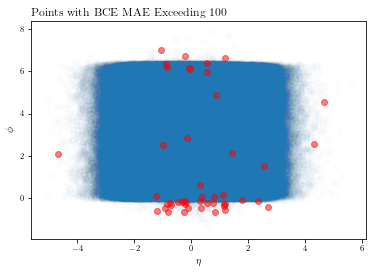

In [40]:
plt.scatter(X[:, 1], X[:, 2], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 1], bad[:, 2], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_eta_phi.png', 
            dpi=300, 
            bbox_inches='tight')

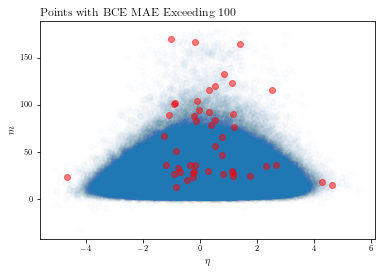

In [41]:
plt.scatter(X[:, 1], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 1], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$m$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_eta_m.png', 
            dpi=300, 
            bbox_inches='tight')

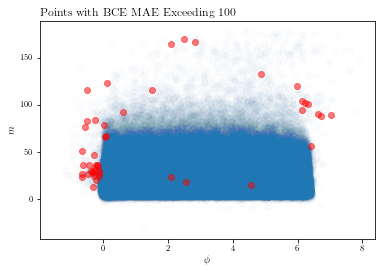

In [42]:
plt.scatter(X[:, 2], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 2], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$m$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_phi_m.png', 
            dpi=300, 
            bbox_inches='tight')

## MLC

In [43]:
# Experiment parameters
num = 0
filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
X_mae = np.load('data/zenodo/fold/' + 'X_tst.npy')
abs_dif_1 = np.load(filestr + 'abs_dif_1.npy')

In [44]:
bad = X_mae[np.any(abs_dif_1 > 100, axis = 0)]

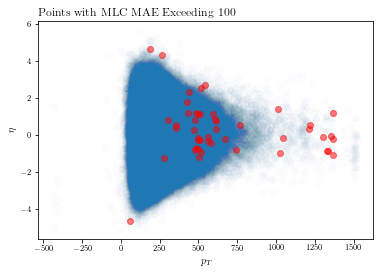

In [45]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 1], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$\eta$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_pt_eta.png', 
            dpi=300, 
            bbox_inches='tight')

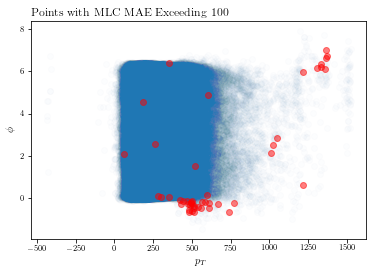

In [46]:
plt.scatter(X[:, 0], X[:, 2], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 2], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$\phi$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_pt_phi.png', 
            dpi=300, 
            bbox_inches='tight')

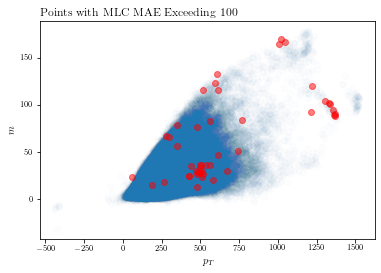

In [47]:
plt.scatter(X[:, 0], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 0], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$m$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_pt_m.png', 
            dpi=300, 
            bbox_inches='tight')

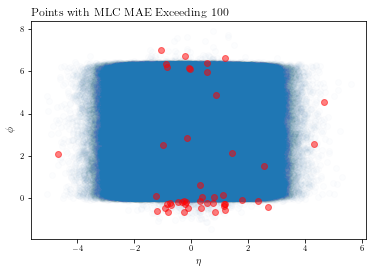

In [48]:
plt.scatter(X[:, 1], X[:, 2], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 1], bad[:, 2], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_eta_phi.png', 
            dpi=300, 
            bbox_inches='tight')

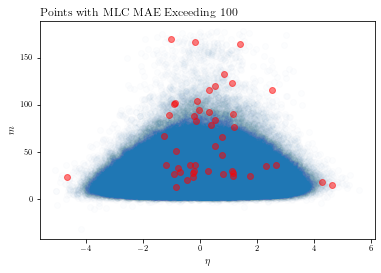

In [49]:
plt.scatter(X[:, 1], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 1], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$m$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_eta_m.png', 
            dpi=300, 
            bbox_inches='tight')

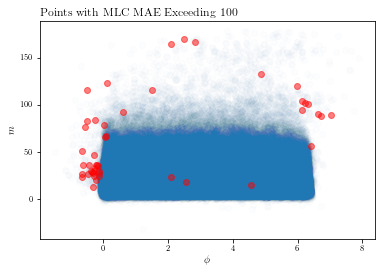

In [50]:
plt.scatter(X[:, 2], X[:, 3], alpha = 0.01, label = 'Flow')
plt.scatter(bad[:, 2], bad[:, 3], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$m$')
plt.title('Points with MLC MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/mlc_phi_m.png', 
            dpi=300, 
            bbox_inches='tight')

## Check Random Slice

In [ ]:
pt = dat_target.sample(1)
pt

In [ ]:
eta

In [ ]:
phi

In [ ]:
eta = pt[0][1]
phi = pt[0][2]
mas = pt[0][3]

# Get a one-dimensional slice of test points.
pTs = np.linspace(0, 1600, 1201).reshape(-1, 1)
etas = np.repeat(eta, len(pTs)).reshape(-1, 1)
phis = np.repeat(phi, len(pTs)).reshape(-1, 1)
mass = np.repeat(mas, len(pTs)).reshape(-1, 1)

xs = np.hstack([pTs, etas, phis, mass])

lr_true = lr(xs)

In [ ]:
xs

### BCE

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [ ]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1, m, s)
    lrs_2[i] = tanh_lr(model_2, m, s)
    lrs_3[i] = arctan_lr(model_3, m, s)

In [ ]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'xs.npy', xs)
np.save(filestr + 'preds_1.npy', preds_1)
np.save(filestr + 'preds_2.npy', preds_2)
np.save(filestr + 'preds_3.npy', preds_3)

In [ ]:
w = 3.5
h = 3.25
ensembles = [preds_1, preds_2, preds_3]
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = '\it BCE Zenodo Models'
filename = 'plots/zenodo/bce.png'

In [ ]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

if title:
    axs[0].set_title(title, loc = 'right')
# Plot likelihood ratios
axs[0].plot(pTs, lr_true, label = 'Exact', c = 'k', lw = 0.75)

n = len(ensembles)

#lrs = [None] * n
#lrrs = [None] * n
#for i in range(n):
#    lrs[i] = avg_lr(ensembles[i])
#    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

for i in range(n):
    axs[0].plot(pTs, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(pTs[0], pTs[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(pTs, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(r'$p_T$')

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MSE

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mse, 'd':4}
params_2 = {'loss':tanh_mse, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_mse, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_mse/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [ ]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1, m, s)
    lrs_2[i] = tanh_lr(model_2, m, s)
    lrs_3[i] = arctan_lr(model_3, m, s)

In [ ]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'xs.npy', xs)
np.save(filestr + 'preds_1.npy', preds_1)
np.save(filestr + 'preds_2.npy', preds_2)
np.save(filestr + 'preds_3.npy', preds_3)

In [ ]:
w = 3.5
h = 3.25
ensembles = [preds_1, preds_2, preds_3]
labels = [r'$\sigma(z)$', r'$\frac{1}{2}\left(\tanh{z} + 1\right)$', r'$\frac{1}{\pi}\left(\arctan{z} + \frac{\pi}{2}\right)$']
y_lim = (0, 3)
title = '\it MSE Zenodo Models'
filename = 'plots/zenodo/mse.png'

In [ ]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

# Plot likelihood ratios
axs[0].plot(pTs, lr_true, label = 'Exact', c = 'k', lw = 0.75)

n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

for i in range(n):
    axs[0].plot(pTs, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(pTs[0], pTs[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(pTs, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(r'$p_T$')

if title:
    axs[0].set_title(title, loc = 'right')

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### MLC

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':mlc, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_mlc, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_mlc, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_mlc/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [ ]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1, m, s)
    lrs_2[i] = tanh_lr(model_2, m, s)
    lrs_3[i] = arctan_lr(model_3, m, s)

In [ ]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'xs.npy', xs)
np.save(filestr + 'preds_1.npy', preds_1)
np.save(filestr + 'preds_2.npy', preds_2)
np.save(filestr + 'preds_3.npy', preds_3)

In [ ]:
w = 3.5
h = 3.25
ensembles = [preds_1, preds_2, preds_3]
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = '\it MLC Zenodo Models'
filename = 'plots/zenodo/mlc.png'

In [ ]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

# Plot likelihood ratios
axs[0].plot(pTs, lr_true, label = 'Exact', c = 'k', lw = 0.75)

n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

for i in range(n):
    axs[0].plot(pTs, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(pTs[0], pTs[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(pTs, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(r'$p_T$')

if title:
    axs[0].set_title(title, loc = 'right')

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')

### SQR

In [ ]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':sqr, 'd': 4, 'output': 'relu'}
params_2 = {'loss':square_sqr, 'd': 4, 'output': 'linear'}
params_3 = {'loss':exp_sqr, 'd': 4, 'output': 'linear'}

filestr = 'models/zenodo/c_sqr/set_{}/'.format(num)
filestr_1 = filestr + 'relu/model_{}.h5'
filestr_2 = filestr + 'square/model_{}.h5'
filestr_3 = filestr + 'exponential/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/fold/X_trn.npy')[:N]
y = np.load('data/zenodo/fold/y_trn.npy')[:N].astype('float32')
data, m, s = split_data(X, y)

In [ ]:
lrs_1 = [None] * reps
lrs_2 = [None] * reps
lrs_3 = [None] * reps

for i in range(reps):
    print(i, end = ' ')
    model_1 = create_model(**params_1)
    model_2 = create_model(**params_2)
    model_3 = create_model(**params_3)
    
    model_1.load_weights(filestr_1.format(i))
    model_2.load_weights(filestr_2.format(i))
    model_3.load_weights(filestr_3.format(i))
    
    lrs_1[i] = odds_lr(model_1, m, s)
    lrs_2[i] = tanh_lr(model_2, m, s)
    lrs_3[i] = arctan_lr(model_3, m, s)

In [ ]:
# Calculate predictions
preds_1 = get_preds(lrs_1, xs)
preds_2 = get_preds(lrs_2, xs)
preds_3 = get_preds(lrs_3, xs)

# Save results
np.save(filestr + 'xs.npy', xs)
np.save(filestr + 'preds_1.npy', preds_1)
np.save(filestr + 'preds_2.npy', preds_2)
np.save(filestr + 'preds_3.npy', preds_3)

In [ ]:
w = 3.5
h = 3.25
ensembles = [preds_1, preds_2, preds_3]
labels = [r'$\text{ReLU}(z)$', r'$z^2$', r'$\exp{z}$']
y_lim = (0, 3)
title = '\it SQR Zenodo Models'
filename = 'plots/zenodo/sqr.png'

In [ ]:
fig, axs = plt.subplots(2, 1,
                        figsize = (w, h),
                        sharex = True, 
                        gridspec_kw = {'height_ratios': [2, 1]})

# Plot likelihood ratios
axs[0].plot(pTs, lr_true, label = 'Exact', c = 'k', lw = 0.75)

n = len(ensembles)

lrs = [None] * n
lrrs = [None] * n
for i in range(n):
    lrs[i] = avg_lr(ensembles[i])
    lrrs[i] = avg_lrr(lr, ensembles[i], xs)

for i in range(n):
    axs[0].plot(pTs, 
                lrs[i], 
                label = labels[i],
                c = cs[i % len(cs)], 
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[0].set_xlim(pTs[0], pTs[-1])
if y_lim:
    axs[0].set_ylim(y_lim[0], y_lim[1])
axs[0].legend()
axs[0].minorticks_on()
axs[0].tick_params(which = 'minor', length = 3)
axs[0].tick_params(which = 'major', length = 5)
axs[0].tick_params(which = 'both', direction='in')
axs[0].set_ylabel('$\mathcal{L}(x)$')

# Plot likelihood ratio ratios
for i in range(n):
    axs[1].plot(pTs, 
                lrrs[i],
                c = cs[i % len(cs)],
                ls = lss[i % len(lss)],
                lw = 0.75)

axs[1].axhline(1,ls=":",color="grey", lw=0.5)
axs[1].axvline(0,ls=":",color="grey", lw=0.5)
axs[1].set_ylim(0.95, 1.05);
axs[1].minorticks_on()
axs[1].tick_params(which = 'minor', length = 3)
axs[1].tick_params(which = 'major', length = 5)
axs[1].tick_params(which = 'both', direction='in')
axs[1].set_ylabel('Ratio')

plt.subplots_adjust(hspace = 0.1)
plt.xlabel(r'$p_T$')

if title:
    axs[0].set_title(title, loc = 'right')

if filename:
    plt.savefig(filename, 
                dpi = 300,
                transparent = True,
                bbox_inches = 'tight')